In [1]:
import robosandbox as rsb
import numpy as np
import plotly.graph_objects as go

# How to add new robot indice in RoboSandbox (rsb)?


## Define the indice
For example, we want to add order independent manipulability: Kim and Khosla solved the problem of dimensional dependency of the manipulability index by taking the geometric mean of the manipulability index ($\mu$). The dimension independent manipulability ($\mu_{O}$) for n-link manipulator is given as: 
$$
\mu_O=\sqrt[n]{\mu}=\sqrt[n]{\operatorname{det}\left(J \cdot J^T\right)}
$$

Reference: 
Kim, J.-O., & Khosla, P. K. (1991). Dexterity measures for design and control of manipulators. IEEE/RJS International Conference on Intelligent RObots and Systems (IROS), 758–763. https://doi.org/10.1109/IROS.1991.174572



In [2]:
def order_independent_manipulability(
    workspace, joint_points, method="order_independent_manipulability", axes="all"
):
    """
    Calculate the order-independent manipulability index for a robot:
    \sqrt[n]{(\operatorname{det}(\mathbf{H}(\mathbf{q}))}
    :param workspace: The workspace instance providing access to the robot.
    :param joint_points: List of joint configurations to evaluate.
    :param method: The method name (for compatibility with the indice registry).
    :param axes: Which axes to consider ('all', 'trans', 'rot').
    :return: The order-independent manipulability indices for each configuration.
    """
    results = []

    for point in joint_points:
        J = workspace.robot.jacob0(point)
        H = J @ J.T

        # Get the determinant of the manipulability matrix
        det_H = np.linalg.det(H)

        # Calculate the nth root of the determinant (n is the matrix dimension)
        n = workspace.robot.dofs
        if det_H > 0:
            order_independent_manip = det_H ** (1 / n)
        else:
            order_independent_manip = 0

        results.append(order_independent_manip)

    return np.array(results)

## Calculate the indice

Steps to calculate the indice:
1. define the robot, such as `robot = rsb.models.DH.Panda()`
2. define the workspace `ws = WorkSpace(robot)`
3. register the new index `ws.add_indice(...)`
4. calculate the global indice `G = ws.global_indice(...)`

In [3]:
robot = rsb.models.DH.Panda()
ws = rsb.performance.workspace.WorkSpace(robot)

# Register the new manipulability index
ws.add_indice(
    method="order_independent_manipulability",
    function=order_independent_manipulability,
    description="Order-independent manipulability index (nth root of determinant)",
)

# Calculate the global indices
print("\nCalculating global indices (this may take a moment)...")
global_oim = ws.global_indice(method="order_independent_manipulability")
print(f"Global order-independent manipulability: {global_oim:.4f}")


Calculating global indices (this may take a moment)...
Global order-independent manipulability: 0.3635


## Visualize the workspace 

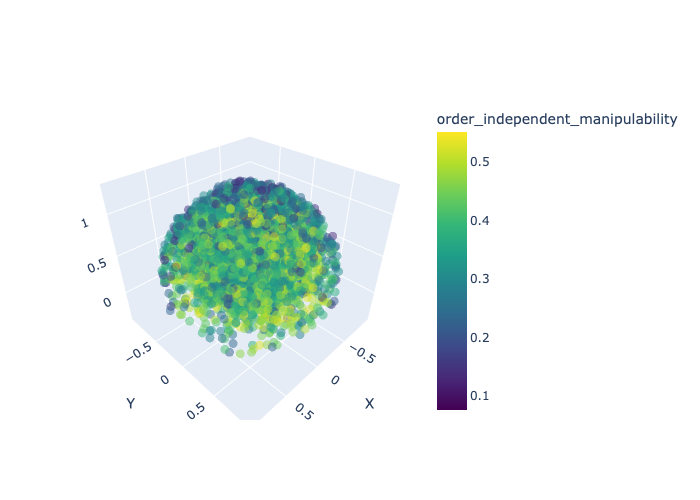

In [4]:
fig = ws.plot(color="order_independent_manipulability", fig=go.Figure())
fig.show("png") # display the plot in PNG format for better visibility on github


In [5]:
print(ws.df)

             x         y         z  order_independent_manipulability
0     0.083013  0.031628  0.162637                          0.310601
1    -0.468596 -0.489116  0.159607                          0.527691
2    -0.602925  0.106552  0.472189                          0.339191
3    -0.323367 -0.487673  0.440707                          0.394792
4     0.771526  0.169249  0.652197                          0.481880
...        ...       ...       ...                               ...
3295 -0.274454 -0.633826  0.934582                          0.386368
3296  0.265889 -0.844161  0.452342                          0.376585
3297  0.383523  0.501138  0.993236                          0.184905
3298  0.188677 -0.160413  1.188917                          0.168826
3299  0.714371 -0.512316  0.557923                          0.131947

[3300 rows x 4 columns]


## 3D voxel / volumetric plot

/Users/chaoyue/miniconda3/envs/robo3.9/lib/python3.9/site-packages/robosandbox/visualization/voxel_data.py:163: UserWarning:

Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.



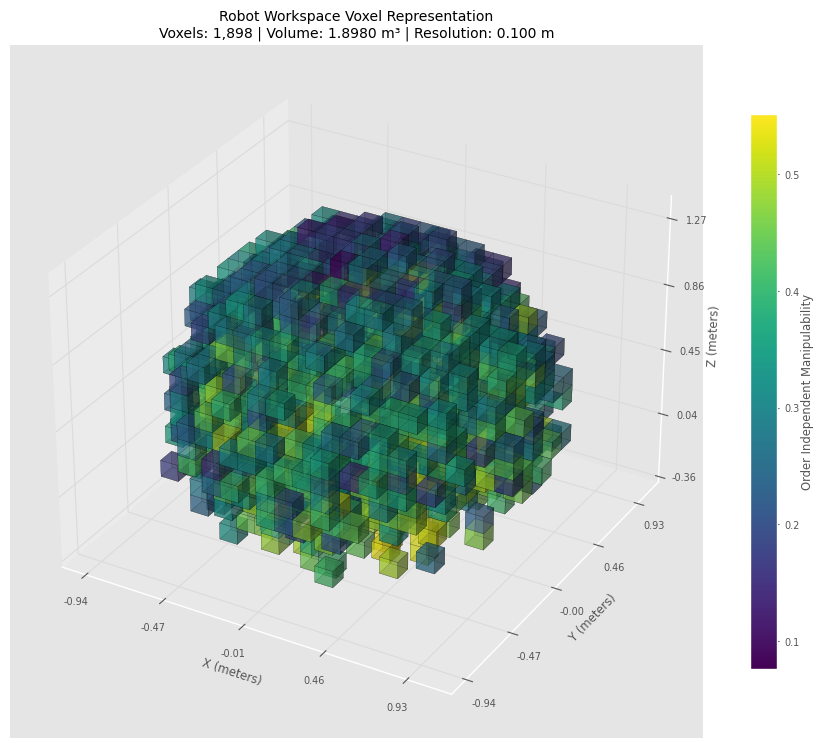

In [10]:
voxels = rsb.visualization.voxel_data.VoxelData(ws.df, voxel_size=0.1, method="order_independent_manipulability")
fig = voxels.plot()